In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [100]:
#load the data
raw_data = pd.read_csv("training_set.csv")

In [101]:
#display the first few rows of the data
display(raw_data.head())

,object_id,mjd,passband,flux,flux_err,detected
0,615,59750.4229,2,-544.810303,3.622952,1
1,615,59750.4306,1,-816.434326,5.553370,1
2,615,59750.4383,3,-471.385529,3.801213,1
3,615,59750.4450,4,-388.984985,11.395031,1
4,615,59752.4070,2,-681.858887,4.041204,1


In [102]:
#load the metadata
metadata_data = pd.read_csv("training_set_metadata.csv")

In [103]:
#display the metadata
display(metadata_data.head())

,object_id,ra,decl,gal_l,gal_b,ddf,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,target
0,615,349.046051,-61.943836,320.796530,-51.753706,1,0.0000,0.0000,0.0000,NaN,0.017,92
1,713,53.085938,-27.784405,223.525509,-54.460748,1,1.8181,1.6267,0.2552,45.4063,0.007,88
2,730,33.574219,-6.579593,170.455585,-61.548219,1,0.2320,0.2262,0.0157,40.2561,0.021,42
3,745,0.189873,-45.586655,328.254458,-68.969298,1,0.3037,0.2813,1.1523,40.7951,0.007,90
4,1124,352.711273,-63.823658,316.922299,-51.059403,1,0.1934,0.2415,0.0176,40.4166,0.024,90


In [104]:
#merge the data with the metadata
df = raw_data.merge(metadata_data, on="object_id")

In [105]:
#display the first few rows of the merged data
display(df.head())

,object_id,mjd,passband,flux,flux_err,detected,ra,decl,gal_l,gal_b,ddf,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,target
0,615,59750.4229,2,-544.810303,3.622952,1,349.046051,-61.943836,320.79653,-51.753706,1,0.0,0.0,0.0,NaN,0.017,92
1,615,59750.4306,1,-816.434326,5.553370,1,349.046051,-61.943836,320.79653,-51.753706,1,0.0,0.0,0.0,NaN,0.017,92
2,615,59750.4383,3,-471.385529,3.801213,1,349.046051,-61.943836,320.79653,-51.753706,1,0.0,0.0,0.0,NaN,0.017,92
3,615,59750.4450,4,-388.984985,11.395031,1,349.046051,-61.943836,320.79653,-51.753706,1,0.0,0.0,0.0,NaN,0.017,92
4,615,59752.4070,2,-681.858887,4.041204,1,349.046051,-61.943836,320.79653,-51.753706,1,0.0,0.0,0.0,NaN,0.017,92


In [106]:
#print the shape of the data
print("Shape of the data:", df.shape)

Shape of the data: (1421705, 17)


In [107]:
#different values of the target column
print("Unique values in target column:", df.target.unique())
print("Shape of target column:", df.target.unique().shape)

Unique values in target column: [92 88 42 90 65 16 67 95 62 15 52  6 64 53]
Shape of target column: (14,)


#Plot on light curve

In [108]:
#get one light curve for one object id
one_light_curve = df[df["object_id"] == 615]

display(one_light_curve.head())
display(one_light_curve.object_id.unique())

,object_id,mjd,passband,flux,flux_err,detected,ra,decl,gal_l,gal_b,ddf,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,target
0,615,59750.4229,2,-544.810303,3.622952,1,349.046051,-61.943836,320.79653,-51.753706,1,0.0,0.0,0.0,NaN,0.017,92
1,615,59750.4306,1,-816.434326,5.553370,1,349.046051,-61.943836,320.79653,-51.753706,1,0.0,0.0,0.0,NaN,0.017,92
2,615,59750.4383,3,-471.385529,3.801213,1,349.046051,-61.943836,320.79653,-51.753706,1,0.0,0.0,0.0,NaN,0.017,92
3,615,59750.4450,4,-388.984985,11.395031,1,349.046051,-61.943836,320.79653,-51.753706,1,0.0,0.0,0.0,NaN,0.017,92
4,615,59752.4070,2,-681.858887,4.041204,1,349.046051,-61.943836,320.79653,-51.753706,1,0.0,0.0,0.0,NaN,0.017,92


array([615])

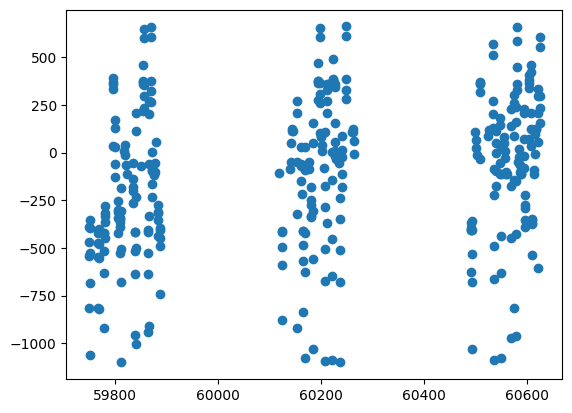

In [109]:
#plot the light curve
fig, ax = plt.subplots()
ax.scatter(one_light_curve["mjd"], one_light_curve["flux"], label="Flux")

In [110]:
#getting only useful columns
light_curve = df[["object_id", "mjd", "passband", "flux", "flux_err", "target"]]

#display the first few rows of the light curve
display(light_curve.head())
#Check the shape of the light curve
print("Shape of the data frame: ", light_curve.shape)

,object_id,mjd,passband,flux,flux_err,target
0,615,59750.4229,2,-544.810303,3.622952,92
1,615,59750.4306,1,-816.434326,5.553370,92
2,615,59750.4383,3,-471.385529,3.801213,92
3,615,59750.4450,4,-388.984985,11.395031,92
4,615,59752.4070,2,-681.858887,4.041204,92


Shape of the data frame:  (1421705, 6)


Feature Extraction

In [111]:
import feets.preprocess

In [112]:
#selecting features

feature_names = [
    "Amplitude",
    "AndersonDarling",
    "MaxSlope",
    "Mean",
    "Meanvariance",
    "MedianAbsDev",
    "Rcs",
    "Skew",
    "Std"
]

#print the feature names
print("Feature names:", feature_names)

Feature names: ['Amplitude', 'AndersonDarling', 'MaxSlope', 'Mean', 'Meanvariance', 'MedianAbsDev', 'Rcs', 'Skew', 'Std']


In [113]:
# Compute features using library
object_ids = light_curve["object_id"].unique()

print("object ids:", object_ids)
print("object ids:", object_ids.shape)

# Select passband
passband = 0

# Store feature values
feature_values = np.zeros((len(object_ids), len(feature_names)))

# Store the targets
targets = np.zeros(len(object_ids))

# Iterate over the object ids
for index, object_id in enumerate(object_ids):
    # Get the light curve for the object id and passband
    light_curve_object = light_curve[
        (light_curve["object_id"] == object_id) & (light_curve["passband"] == passband)
    ]
    lc_data = light_curve_object[["mjd", "flux", "flux_err"]]
    
    # Make sure there are enough data points
    if lc_data.shape[0] < 2:
        print(f"Skipping object_id {object_id}: not enough data points in passband {passband}")
        continue
    
    # Convert to numpy arrays for feets
    time = lc_data["mjd"].values
    magnitude = lc_data["flux"].values
    error = lc_data["flux_err"].values
    
    # Feature extraction
    fs = feets.FeatureSpace(only=feature_names, data=["time", "magnitude", "error"])
    try:
        features, values = fs.extract(time, magnitude, error)
        feature_values[index, :] = values
        # Store the target
        targets[index] = light_curve_object.iloc[0, -1]
    except Exception as e:
        print(f"Feature extraction failed for object_id {object_id}: {e}")
        continue

object ids: [      615       713       730 ... 130762946 130772921 130779836]
object ids: (7848,)


c:\Users\AELEF\Desktop\Machine Learning for Astroinformatics\venv\Lib\site-packages\feets\extractors\core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
c:\Users\AELEF\Desktop\Machine Learning for Astroinformatics\venv\Lib\site-packages\feets\extractors\core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
c:\Users\AELEF\Desktop\Machine Learning for Astroinformatics\venv\Lib\site-packages\feets\extractors\core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
c:\Users\AELEF\Desktop\Machine Learning for Astroinformatics\venv\Lib\site-package

In [114]:
#check the arrays
print("Feature values shape:", feature_values.shape)

#check the targets arrays
print("Targets shape:", targets.shape)

Feature values shape: (7848, 9)
Targets shape: (7848,)


Build Data Frame from Computed Features

In [115]:
#concatinate the arrays into one array
features_values_with_targets = np.c_[object_ids,feature_values, targets]

print("Shape of the features values with targets:", features_values_with_targets.shape)

#Create a column names list
column_names = ["object_id"] + feature_names + ["target"]

print("Column names:", column_names)

#Create a DataFrame from the features values with targets
features_light_curves = pd.DataFrame(features_values_with_targets, columns=column_names)

#display the first few rows of the features light curves
display(features_light_curves.head())

Shape of the features values with targets: (7848, 11)
Column names: ['object_id', 'Amplitude', 'AndersonDarling', 'MaxSlope', 'Mean', 'Meanvariance', 'MedianAbsDev', 'Rcs', 'Skew', 'Std', 'target']


,object_id,Amplitude,AndersonDarling,MaxSlope,Mean,Meanvariance,MedianAbsDev,Rcs,Skew,Std,target
0,615.0,117.660498,1.000000,184.863919,-3.254554,-25.587479,79.958667,0.294085,0.125827,83.275842,92.0
1,713.0,11.347079,0.999936,11.418733,-2.720398,-2.596133,6.054598,0.436782,0.254446,7.062516,88.0
2,730.0,3.302110,0.362424,5.987811,-0.048080,-37.772702,1.205846,0.086680,0.349431,1.816127,42.0
3,745.0,9.511895,1.000000,13.567209,1.797523,2.416637,1.720855,0.282359,1.980815,4.343961,90.0
4,1124.0,4.585307,0.538771,6.992729,0.660948,3.542304,1.365366,0.206023,-0.324207,2.341279,90.0


Supervised Classification using only two features

In [116]:
#from the data

#get the data
x = features_light_curves.loc[:, ["Amplitude", "AndersonDarling"]]
print("Shape of x:", x.shape)

#get the target
y = features_light_curves.loc[:, ["target"]]
print("Shape of y:", y.shape)

Shape of x: (7848, 2)
Shape of y: (7848, 1)


In [117]:
#import libraries for machine learning
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

#Define the model
logistics_regression_model = LogisticRegression(
    multi_class= "auto"
)

#train the model
logistics_regression_model.fit(x, y)

c:\Users\AELEF\Desktop\Machine Learning for Astroinformatics\venv\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\AELEF\Desktop\Machine Learning for Astroinformatics\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\AELEF\Desktop\Machine Learning for Astroinformatics\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data a

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'auto'


In [118]:
#print the f1 score
print("f1 score:", f1_score(y, logistics_regression_model.predict(x), average="weighted"))

#get accuracy
print("Accuracy:", logistics_regression_model.score(x, y))

f1 score: 0.19911922850803507
Accuracy: 0.33116717635066256


Prediction with LR

In [119]:
#new data
variable_1 = 117
variable_2 = 1.00

#defining the arrays
variables = np.array([[variable_1, variable_2]])

#do the prediction
prediction = logistics_regression_model.predict(np.array(variables))

#print the prediction
print("Prediction for variables", variables, ":", prediction[0])

Prediction for variables [[117.   1.]] : 16.0


c:\Users\AELEF\Desktop\Machine Learning for Astroinformatics\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Supervised classification Logistic Regration (LR) with more than 2 features

In [120]:
#get all the data
W = features_light_curves.loc[:, ["Amplitude", "AndersonDarling", "MaxSlope", "Mean", "Meanvariance", "MedianAbsDev", "Rcs", "Skew", "Std"]]
print("Shape of W:", W.shape)

#get the targets

Y = features_light_curves.loc[:, ["target"]]

print("Shape of Y:", Y.shape)

Shape of W: (7848, 9)
Shape of Y: (7848, 1)


In [121]:
#define the model
logistics_regression_model_all = LogisticRegression(
    max_iter = 10000,
    multi_class= "auto",
    class_weight= "balanced",
    solver= "lbfgs",
    random_state=0 
)
#train the model
logistics_regression_model_all.fit(W, Y)

c:\Users\AELEF\Desktop\Machine Learning for Astroinformatics\venv\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\AELEF\Desktop\Machine Learning for Astroinformatics\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\AELEF\Desktop\Machine Learning for Astroinformatics\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 10000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=10000).
You might also want to scale the da

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,0
,solver,'lbfgs'
,max_iter,10000
,multi_class,'auto'


In [122]:
#get f1 score
print("f1 score: ", f1_score(Y, logistics_regression_model_all.predict(W), average="weighted") )

#get accuracy
print("Accuracy:", logistics_regression_model_all.score(W, Y))

f1 score:  0.16387422344601316
Accuracy: 0.19457186544342508


Dimensionality Reduction using PCA (Unsupervised Learning)

In [123]:
#import libraries
from sklearn.decomposition import PCA

In [124]:
#get the data to transform

A = features_light_curves[feature_names]

#print("Shape of A:", A.shape)

#Define the number of components
n_components = 3

#Create the PCA model
pca_model = PCA(n_components=n_components)

#transform the data using PCA
principal_componenets = pca_model.fit_transform(A)

#Check the shape
#print("Shape of principal components:", principal_componenets.shape)

#Create a DataFrame with the principal components
principal_components_df = pd.DataFrame(
    data=principal_componenets,
    columns=[f"Principal Component {i+1}" for i in range(n_components)]
)
#check the data shape
#print("Shape of principal components DataFrame:", principal_components_df.shape)

#add object id
principal_components_df["object_id"] = features_light_curves["object_id"].values

#check the data shape
#print("Shape of principal components DataFrame:", principal_components_df.shape)

#add target
principal_components_df["target"] = features_light_curves["target"].values

#display
display(principal_components_df.head())

,Principal Component 1,Principal Component 2,Principal Component 3,object_id,target
0,-274.735506,111.728990,-29.438882,615.0,92.0
1,-482.339620,18.060015,-6.506988,713.0,88.0
2,-494.000291,17.651737,-41.688237,730.0,42.0
3,-484.673868,21.028289,-1.505744,745.0,90.0
4,-492.282678,17.858165,-0.374421,1124.0,90.0


<BarContainer object of 3 artists>

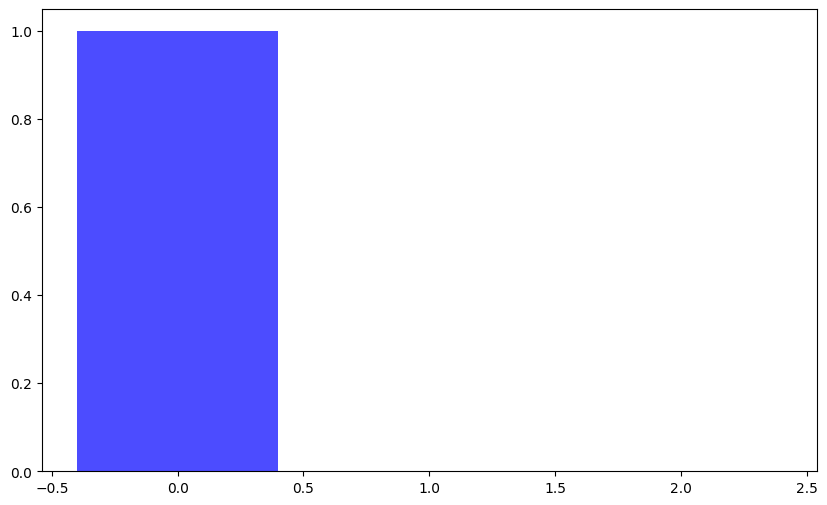

In [125]:
#plot the explained variance

fid, ax = plt.subplots(figsize=(10, 6))
ax.bar(np.arange(n_components), pca_model.explained_variance_ratio_, alpha=0.7, color='blue')


Supervised Clasification with logestic regression using PCA Data

In [126]:
#import libraries
from sklearn.linear_model import LogisticRegression

# Define the model
logistics_regression_pca = LogisticRegression(
    multi_class="auto",
)
# Train the model
logistics_regression_pca.fit(principal_componenets, Y)

c:\Users\AELEF\Desktop\Machine Learning for Astroinformatics\venv\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\AELEF\Desktop\Machine Learning for Astroinformatics\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\AELEF\Desktop\Machine Learning for Astroinformatics\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data a

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'auto'


In [127]:
#get f1 score
print("f1 score with PCA:", f1_score(y, logistics_regression_pca.predict(principal_componenets), average="weighted"))

#get accuracy
print("Accuracy with PCA:", logistics_regression_pca.score(principal_componenets, Y))

f1 score with PCA: 0.18198140291370804
Accuracy with PCA: 0.32020897043832824
